# **Customer segmentation using Clustering Model**


# ➤ **Clustering**

Cluster analysis is the grouping of objects such that objects in the same cluster are more similar to each other than they are to objects in another cluster. 
* The classification into clusters is done using criteria such as smallest distances, density of data points, graphs, or various statistical distributions.


➤ **Customer Segmentation**

Customer segmentation is the process of dividing customers into groups based on common characteristics

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Umesh Project Files/office products and Cd-vinyl/final true records.csv')

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.head()

reviewerID        asin     reviewerName  verified  \
0  A2YCGMW0ZKPYZ2  0788602144  Bernard Perusse      True   
1   A5N992ESD6UHW  0967680654        Jonny Lee      True   
2  A35L775VMC0BKL  0967680654               Fm      True   
3  A1ZJJKOC38Q622  0967680654            mitzi      True   
4  A2S78BQKIPAMT7  0967680654         faithful      True   

                                          reviewText  \
0  The answer, of course, is no. A lot of time ha...   
1  A bit outdated, from a special-effects/technol...   
2                                          Thank you   
3                                          very good   
4  This is good for someone who is trying to make...   

                             preprocessed_reviewText  polarity_score  \
0  answer course lot time spent whining stuff hul...        0.301852   
1  bit outdated special effect technology point v...        0.025562   
2                                              thank        0.000000   
3                                               good        0.700000   
4  good someone trying make decision think help m...        0.700000   

   polarity  overall        date  \
0  positive        4  2002-07-08   
1   neutral        4  2016-06-21   
2   neutral        5  2015-11-18   
3  positive        5  2015-01-21   
4  positive        5  2013-02-02   

                                             summary            brand  \
0                              Nostalgia: overrated?  Patrick Adiarte   
1  Would be Nice to See This Effective Concept Re...     Daniel Kruse   
2                                         Five Stars     Daniel Kruse   
3                                         Five Stars     Daniel Kruse   
4                                   Escape from Hell     Daniel Kruse   

                                    category     main_cat sub_category  
0  CDs & Vinyl,Classic Rock,British Invasion  Movies & TV          DVD  
1   CDs & Vinyl,Christian,Pop & Contemporary  Movies & TV          DVD  
2   CDs & Vinyl,Christian,Pop & Contemporary  Movies & TV          DVD  
3   CDs & Vinyl,Christian,Pop & Contemporary  Movies & TV          DVD  
4   CDs & Vinyl,Christian,Pop & Contemporary  Movies & TV     Audio CD

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans


# Extract the 'reviewText' column and convert it to a list of strings
reviews = df['preprocessed_reviewText'].tolist()

In [ ]:
# Create a TfidfVectorizer to convert the reviews into numerical feature vectors
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(reviews)

In [ ]:
# Create a KMeans model with 3 clusters
kmeans = KMeans(n_clusters=3)

# Fit the model to the data
kmeans.fit(X)


KMeans(n_clusters=3)

In [ ]:
# Add the cluster labels to the DataFrame
df['cluster'] = kmeans.labels_

# Print the resulting DataFrame
df.head()

reviewerID        asin     reviewerName  verified  \
0  A2YCGMW0ZKPYZ2  0788602144  Bernard Perusse      True   
1   A5N992ESD6UHW  0967680654        Jonny Lee      True   
2  A35L775VMC0BKL  0967680654               Fm      True   
3  A1ZJJKOC38Q622  0967680654            mitzi      True   
4  A2S78BQKIPAMT7  0967680654         faithful      True   

                                          reviewText  \
0  The answer, of course, is no. A lot of time ha...   
1  A bit outdated, from a special-effects/technol...   
2                                          Thank you   
3                                          very good   
4  This is good for someone who is trying to make...   

                             preprocessed_reviewText  polarity_score  \
0  answer course lot time spent whining stuff hul...        0.301852   
1  bit outdated special effect technology point v...        0.025562   
2                                              thank        0.000000   
3                                               good        0.700000   
4  good someone trying make decision think help m...        0.700000   

   polarity  overall        date  \
0  positive        4  2002-07-08   
1   neutral        4  2016-06-21   
2   neutral        5  2015-11-18   
3  positive        5  2015-01-21   
4  positive        5  2013-02-02   

                                             summary            brand  \
0                              Nostalgia: overrated?  Patrick Adiarte   
1  Would be Nice to See This Effective Concept Re...     Daniel Kruse   
2                                         Five Stars     Daniel Kruse   
3                                         Five Stars     Daniel Kruse   
4                                   Escape from Hell     Daniel Kruse   

                                    category     main_cat sub_category  \
0  CDs & Vinyl,Classic Rock,British Invasion  Movies & TV          DVD   
1   CDs & Vinyl,Christian,Pop & Contemporary  Movies & TV          DVD   
2   CDs & Vinyl,Christian,Pop & Contemporary  Movies & TV          DVD   
3   CDs & Vinyl,Christian,Pop & Contemporary  Movies & TV          DVD   
4   CDs & Vinyl,Christian,Pop & Contemporary  Movies & TV     Audio CD   

   cluster  
0        1  
1        2  
2        2  
3        1  
4        1

In [ ]:
data=df.copy()

In [ ]:
df['cluster'].unique()

array([1, 2, 0], dtype=int32)

## **No. of Clusters and Value counts**

In [ ]:
df['cluster'].value_counts()

1    1154981
2     155597
0      60353
Name: cluster, dtype: int64

In [ ]:
grouped = df.groupby(by=['polarity','cluster']).mean()
grouped

verified  polarity_score   overall
polarity cluster                                    
negative 0             1.0       -0.218605  3.569798
neutral  2             1.0        0.001826  4.304016
positive 1             1.0        0.454742  4.653188

In [ ]:
p=df[df['polarity']=='positive']

In [ ]:
p['reviewerID'][:10]

0     A2YCGMW0ZKPYZ2
3     A1ZJJKOC38Q622
4     A2S78BQKIPAMT7
5     A2U4W69NZJT4LD
7     A3131Z6Z19K7U4
8      ARUWE49F6B5WR
9     A1I98GJAHJHSAM
10    A2ETUJ85QMEJ4Q
11    A1YMNSJL40IFEH
12     ALV36ZC8V0GZI
Name: reviewerID, dtype: object

In [ ]:
p['main_cat'].nunique()

36

**satisfied Customers user ids** 

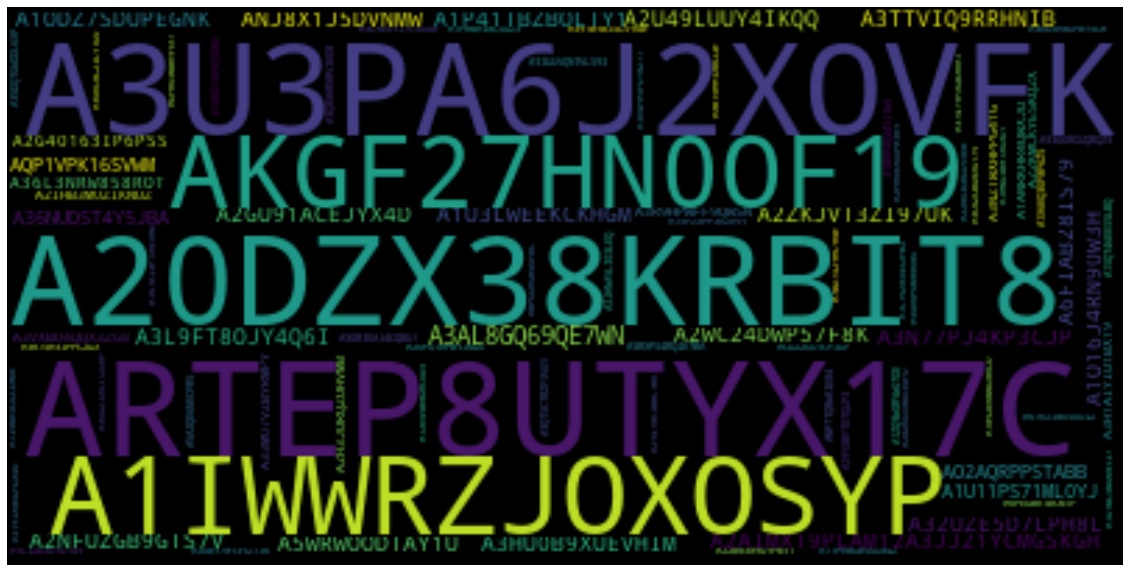

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Get only the positive reviews
positive_reviews = df[df['polarity'] == 'positive']['reviewerID'].values

# Join all the reviews into a single string
review_text = ' '.join(positive_reviews)

# Create a wordcloud object
wordcloud = WordCloud().generate(review_text)

# Plot the wordcloud
plt.figure(figsize=(20,26))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# **Dissatisfied customers**

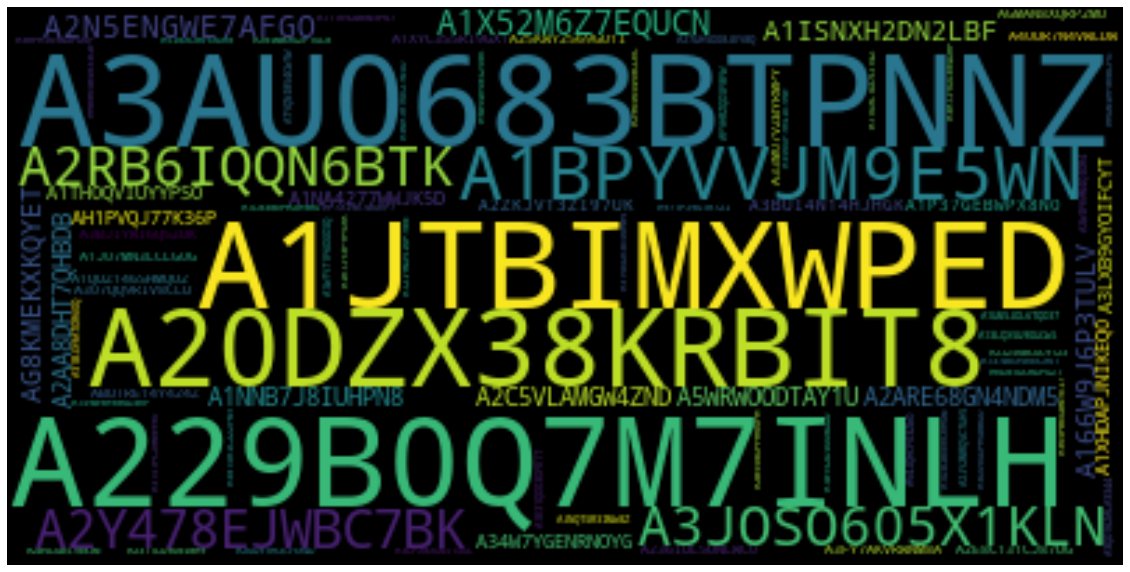

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Get only the positive reviews
positive_reviews = df[df['polarity'] == 'negative']['reviewerID'].values

# Join all the reviews into a single string
review_text = ' '.join(positive_reviews)

# Create a wordcloud object
wordcloud = WordCloud().generate(review_text)

# Plot the wordcloud
plt.figure(figsize=(20,26))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

**These are product ids that may be good recomendations to a Customers** 

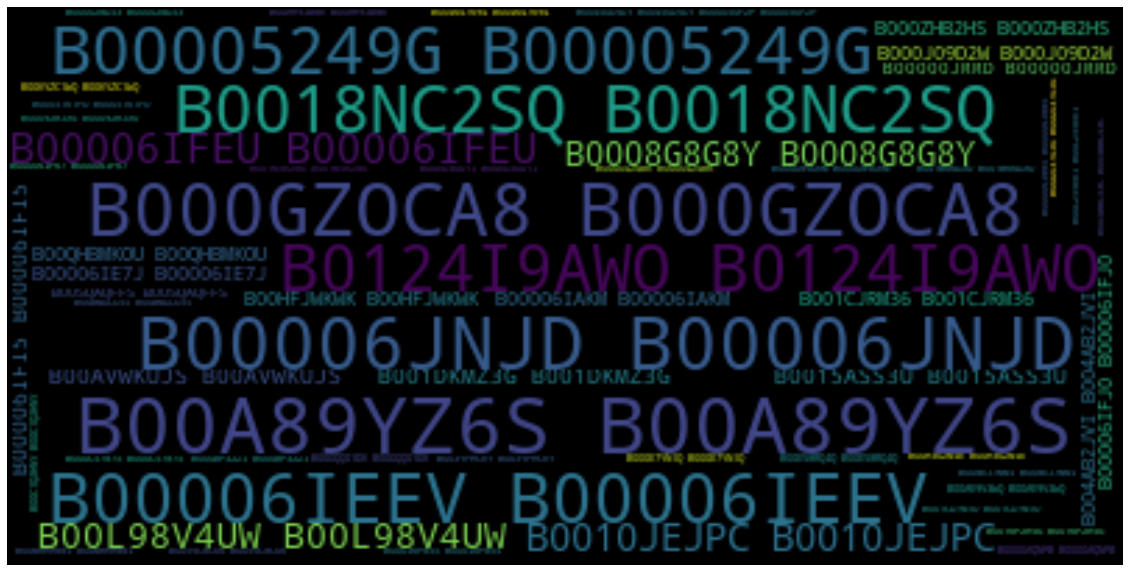

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Get only the positive reviews
positive_reviews = df[df['polarity'] == 'positive']['asin'].values

# Join all the reviews into a single string
review_text = ' '.join(positive_reviews)

# Create a wordcloud object
wordcloud = WordCloud().generate(review_text)

# Plot the wordcloud
plt.figure(figsize=(20,26))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

**These are product ids that may be  not good recomendations to a Customers**

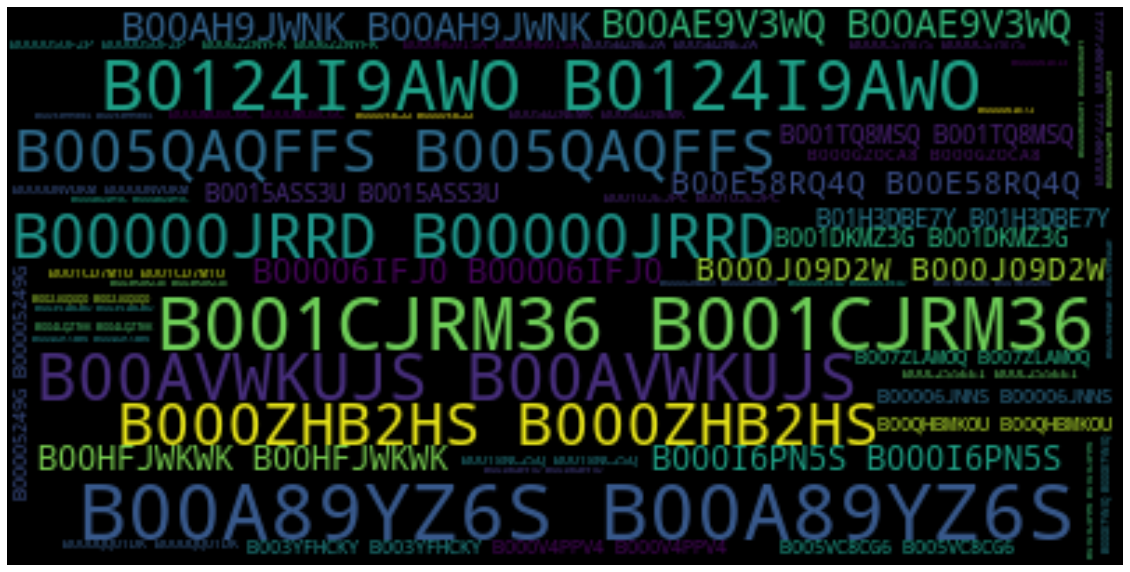

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Get only the positive reviews
positive_reviews = df[df['polarity'] == 'negative']['asin'].values

# Join all the reviews into a single string
review_text = ' '.join(positive_reviews)

# Create a wordcloud object
wordcloud = WordCloud().generate(review_text)

# Plot the wordcloud
plt.figure(figsize=(20,26))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
positive=df[df['polarity']=='positive']
negative=df[df['polarity']=='negative']
neutral=df[df['polarity']=='neutral']


# **brands that are more liked by the customers** 

In [ ]:
# Assume 'df' is the name of your dataframe
df_positive_brand = positive.groupby(['brand']).size().reset_index(name='counts')
df_positive_brand  = df_positive_brand .sort_values(by='counts', ascending=False).reset_index(drop=True)

In [ ]:
df_positive_brand.head(5)

brand  counts
0  Various Artists   76579
1            Avery   16817
2            Canon   15743
3               HP   15111
4            Pilot   14720

In [ ]:
# Assume 'df' is the name of your dataframe
df_negative_brand = negative.groupby(['brand']).size().reset_index(name='counts')
df_negative_brand  = df_negative_brand .sort_values(by='counts', ascending=False).reset_index(drop=True)

In [ ]:
df_negative_brand.head(5)

brand  counts
0  Various Artists    2453
1               HP    1708
2            Canon    1442
3            Avery    1331
4          Brother    1131

In [ ]:
df_neutral_brand = neutral.groupby(['brand']).size().reset_index(name='counts')
df_neutral_brand  = df_neutral_brand .sort_values(by='counts', ascending=False).reset_index(drop=True)

In [ ]:
df_neutral_brand.head(5)

brand  counts
0  Various Artists    7948
1               HP    3758
2            Avery    3352
3            Canon    3243
4          Brother    2448

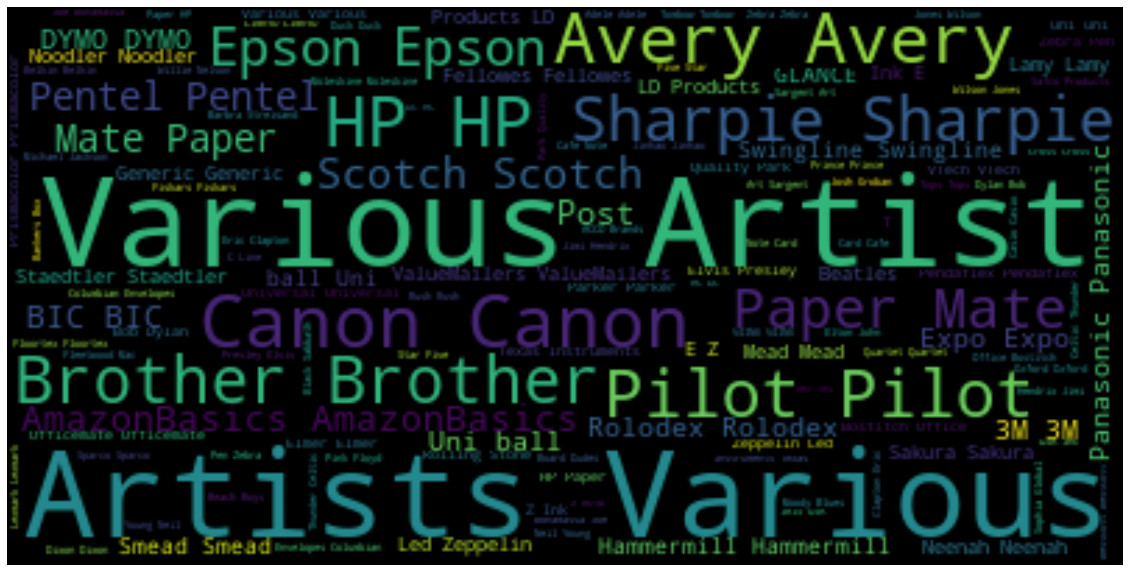

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Get only the positive reviews
positive_reviews = df[df['polarity'] == 'positive']['brand'].values

# Join all the reviews into a single string
review_text = ' '.join(positive_reviews)

# Create a wordcloud object
wordcloud = WordCloud().generate(review_text)

# Plot the wordcloud
plt.figure(figsize=(20,26))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

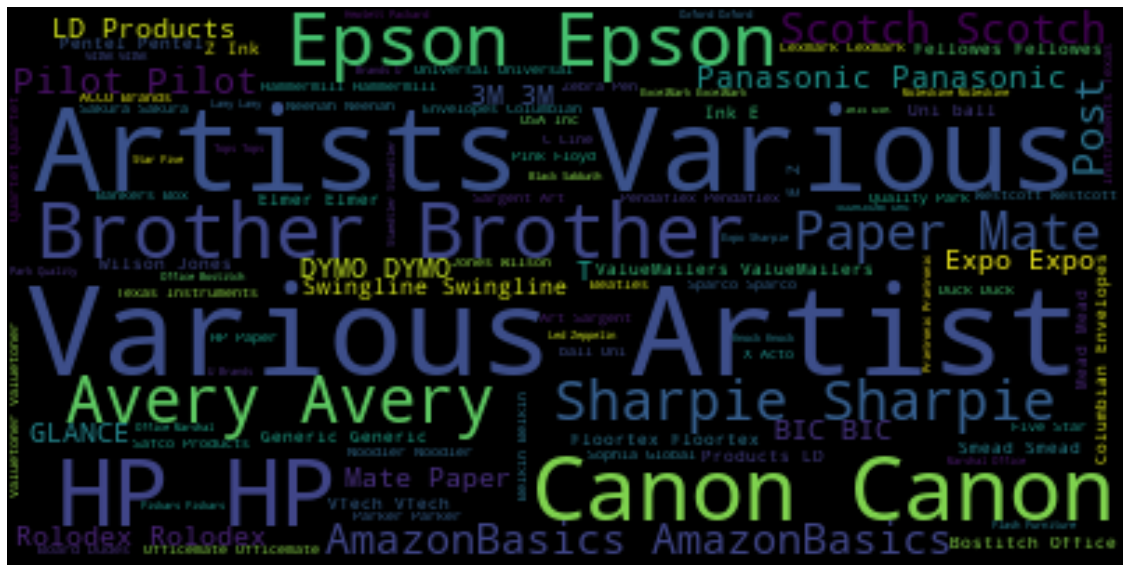

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Get only the positive reviews
positive_reviews = df[df['polarity'] == 'negative']['brand'].values

# Join all the reviews into a single string
review_text = ' '.join(positive_reviews)

# Create a wordcloud object
wordcloud = WordCloud().generate(review_text)

# Plot the wordcloud
plt.figure(figsize=(20,26))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# **cluster distribution**

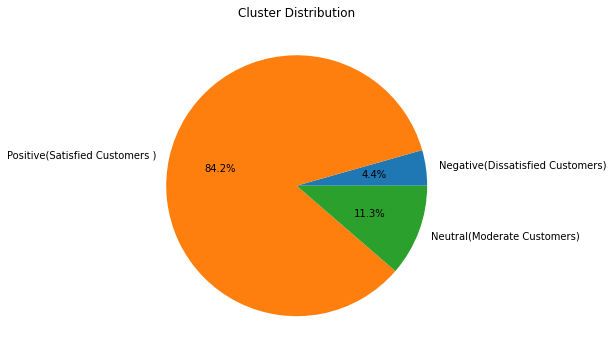

In [ ]:
import matplotlib.pyplot as plt
    
# group by category and get the count of each category
category_count = df.groupby('cluster').size().reset_index(name='counts')
# set the category column as the labels of the pie chart
labels = category_count['cluster'].tolist()
# set the count column as the values of the pie chart
values = category_count['counts'].tolist()

plt.figure(figsize=(6,6))
plt.pie(values, labels=['Negative(Dissatisfied Customers)','Positive(Satisfied Customers )','Neutral(Moderate Customers)'], autopct='%1.1f%%')
plt.title("Cluster Distribution")
plt.show()

In [ ]:
# create a new DataFrame with specific columns
columns_to_keep = ['preprocessed_reviewText', 'polarity_score', 'polarity','cluster']
new_df =df.loc[:,columns_to_keep]
new_df

preprocessed_reviewText  polarity_score  \
0        answer course lot time spent whining stuff hul...        0.301852   
1        bit outdated special effect technology point v...        0.025562   
2                                                    thank        0.000000   
3                                                     good        0.700000   
4        good someone trying make decision think help m...        0.700000   
...                                                    ...             ...   
1375267                                                 ok        0.500000   
1375268  awesome perfect art work thnk super fast delivery        0.633333   
1375269                                             useful        0.300000   
1375270                                               good        0.700000   
1375271  good bag issue static pull seems worse brand m...        0.320000   

         polarity  cluster  
0        positive        1  
1         neutral        2  
2         neutral        2  
3        positive        1  
4        positive        1  
...           ...      ...  
1375267  positive        1  
1375268  positive        1  
1375269  positive        1  
1375270  positive        1  
1375271  positive        1  

[1370931 rows x 4 columns]

# **here we can see the goup by main_act of brand of Satisafied customers**

In [ ]:
# Assume 'df' is the name of your dataframe
df_positive = positive.groupby(['main_cat'])['brand'].size().reset_index(name='counts')
df_positive = df_positive.sort_values(by='counts', ascending=False).reset_index(drop=True)

In [ ]:
df_positive

main_cat  counts
0                   Digital Music  624047
1                 Office Products  399933
2                 All Electronics   48018
3                     Amazon Home   20799
4           Arts, Crafts & Sewing   12826
5                     Movies & TV   11006
6         Industrial & Scientific    8811
7                       Computers    7253
8        Tools & Home Improvement    6869
9                    Toys & Games    2771
10         Health & Personal Care    2766
11                          Books    2209
12              Sports & Outdoors    1534
13      Cell Phones & Accessories     865
14      Arts, Crafts &amp; Sewing     650
15           Home Audio & Theater     606
16   Tools &amp; Home Improvement     596
17                     Automotive     549
18                 Camera & Photo     496
19    Industrial &amp; Scientific     475
20                     All Beauty     457
21                 AMAZON FASHION     406
22                           Baby     167
23               Toys &amp; Games     162
24                       Software     139
25     Health &amp; Personal Care     129
26       Home Audio &amp; Theater      91
27                   Pet Supplies      85
28            Musical Instruments      66
29          Sports &amp; Outdoors      63
30                     Gift Cards      58
31  Cell Phones &amp; Accessories      29
32                   Buy a Kindle      21
33                        Grocery      19
34   Portable Audio & Accessories       5
35                 Amazon Devices       5

# **here we can see the goup by main_act of brand of dissatisafied customers**

In [ ]:
# Assume 'df' is the name of your dataframe
df_negative = negative.groupby(['main_cat'])['brand'].size().reset_index(name='counts')
df_negative = df_negative.sort_values(by='counts', ascending=False).reset_index(drop=True)

In [ ]:
df_negative

main_cat  counts
0                 Office Products   30879
1                   Digital Music   19521
2                 All Electronics    4142
3                     Amazon Home    1595
4           Arts, Crafts & Sewing     850
5         Industrial & Scientific     704
6        Tools & Home Improvement     661
7                       Computers     511
8                     Movies & TV     327
9                    Toys & Games     184
10         Health & Personal Care     180
11              Sports & Outdoors     144
12                          Books      91
13   Tools &amp; Home Improvement      76
14      Cell Phones & Accessories      69
15                     Automotive      65
16                 Camera & Photo      48
17           Home Audio & Theater      48
18                 AMAZON FASHION      45
19      Arts, Crafts &amp; Sewing      42
20    Industrial &amp; Scientific      34
21                     All Beauty      33
22                       Software      28
23     Health &amp; Personal Care      15
24               Toys &amp; Games      13
25       Home Audio &amp; Theater      12
26                           Baby      10
27  Cell Phones &amp; Accessories       6
28                   Pet Supplies       5
29          Sports &amp; Outdoors       5
30            Musical Instruments       4
31                        Grocery       3
32                 Amazon Devices       2
33                     Gift Cards       1

# **here we can see the goup by main_act of brand of moderate customers**

In [ ]:

df_neutral = neutral.groupby(['main_cat'])['brand'].size().reset_index(name='counts')
df_neutral = df_neutral.sort_values(by='counts', ascending=False).reset_index(drop=True)

In [ ]:
df_neutral 

main_cat  counts
0                 Office Products   70798
1                   Digital Music   64033
2                 All Electronics    8355
3                     Amazon Home    3131
4           Arts, Crafts & Sewing    1773
5         Industrial & Scientific    1555
6        Tools & Home Improvement    1349
7                       Computers    1063
8                     Movies & TV    1013
9          Health & Personal Care     430
10                   Toys & Games     409
11              Sports & Outdoors     310
12                          Books     236
13           Home Audio & Theater     145
14   Tools &amp; Home Improvement     141
15                     Automotive     122
16      Cell Phones & Accessories     111
17                     All Beauty      93
18                 AMAZON FASHION      86
19                 Camera & Photo      84
20      Arts, Crafts &amp; Sewing      77
21    Industrial &amp; Scientific      71
22                       Software      57
23                           Baby      28
24       Home Audio &amp; Theater      25
25     Health &amp; Personal Care      22
26               Toys &amp; Games      20
27                   Pet Supplies      17
28          Sports &amp; Outdoors      11
29  Cell Phones &amp; Accessories      10
30                     Gift Cards       8
31            Musical Instruments       7
32                   Buy a Kindle       4
33                        Grocery       3

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sb

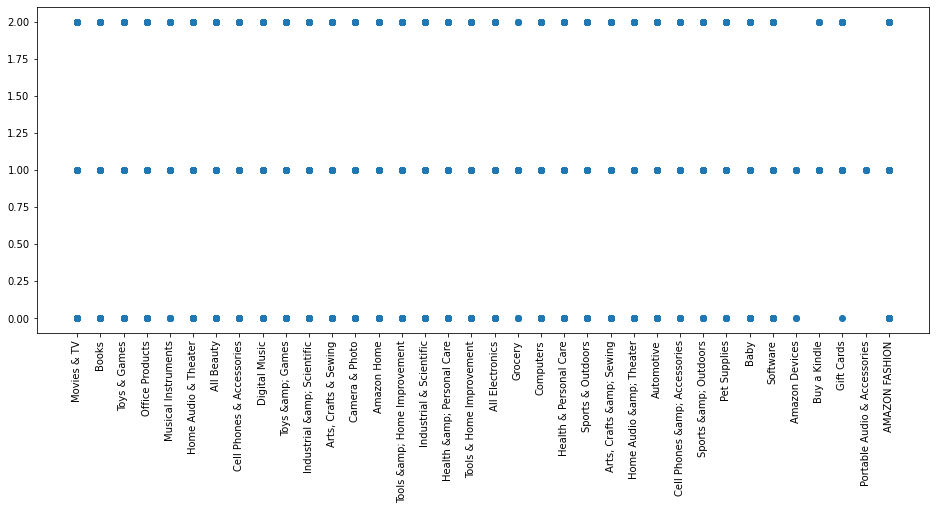

In [ ]:
plt.figure(figsize=(16,6))
plt.scatter(df['main_cat'],df['cluster'])
plt.xticks(rotation=90)
plt.show()


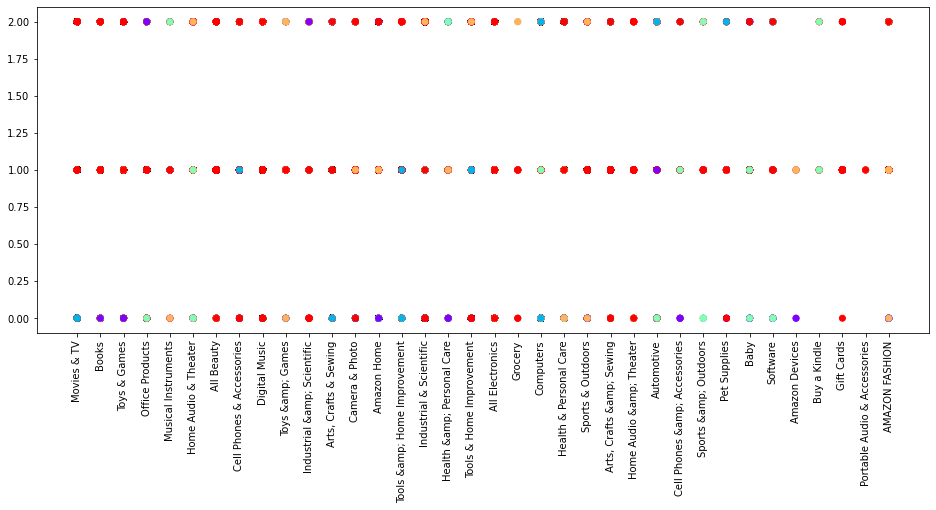

In [ ]:
plt.figure(figsize=(16,6))
plt.scatter(df['main_cat'],df['cluster'],c=df['overall'] ,cmap='rainbow')
plt.xticks(rotation=90)
plt.show()

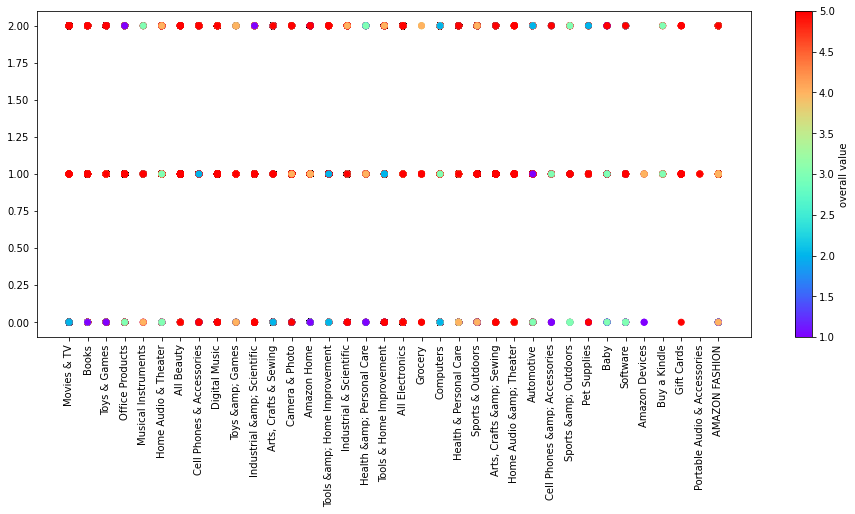

In [ ]:
    plt.figure(figsize=(16,6))
    plt.scatter(df['main_cat'], df['cluster'], c=df['overall'], cmap='rainbow')
    plt.xticks(rotation=90)

    #Create a legend
    cbar = plt.colorbar()
    cbar.set_label("overall value")

    plt.show()


# **here we can see the main categories who has given the Satisfied customers**

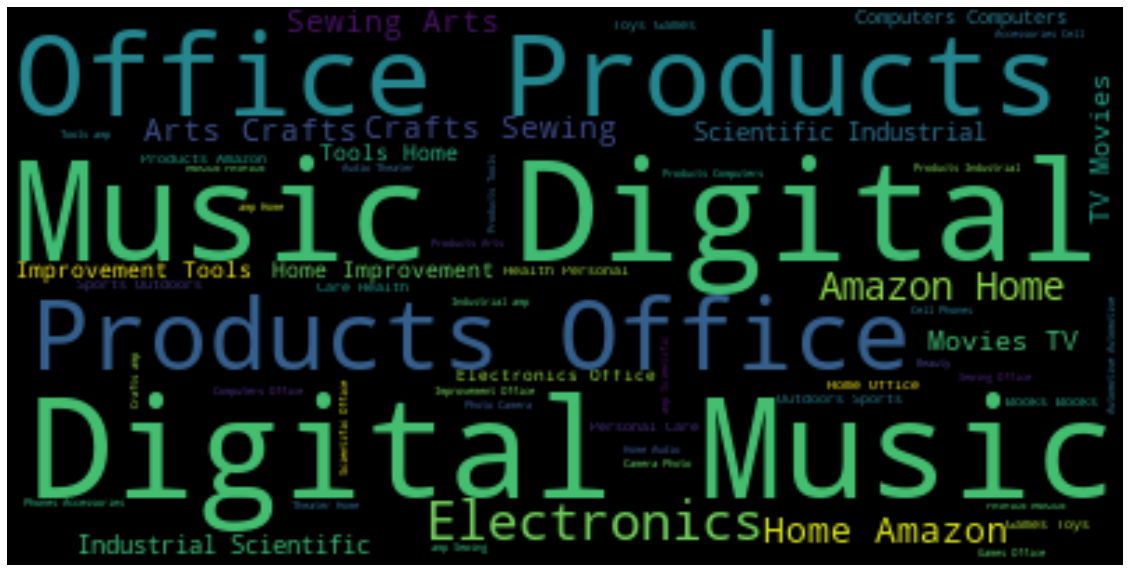

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Get only the positive reviews
positive_reviews = df[df['polarity'] == 'positive']['main_cat'].values

# Join all the reviews into a single string
review_text = ' '.join(positive_reviews)

# Create a wordcloud object
wordcloud = WordCloud().generate(review_text)

# Plot the wordcloud
plt.figure(figsize=(20,26))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


# **here we can see the main categories who has given the dissatisfied customers**

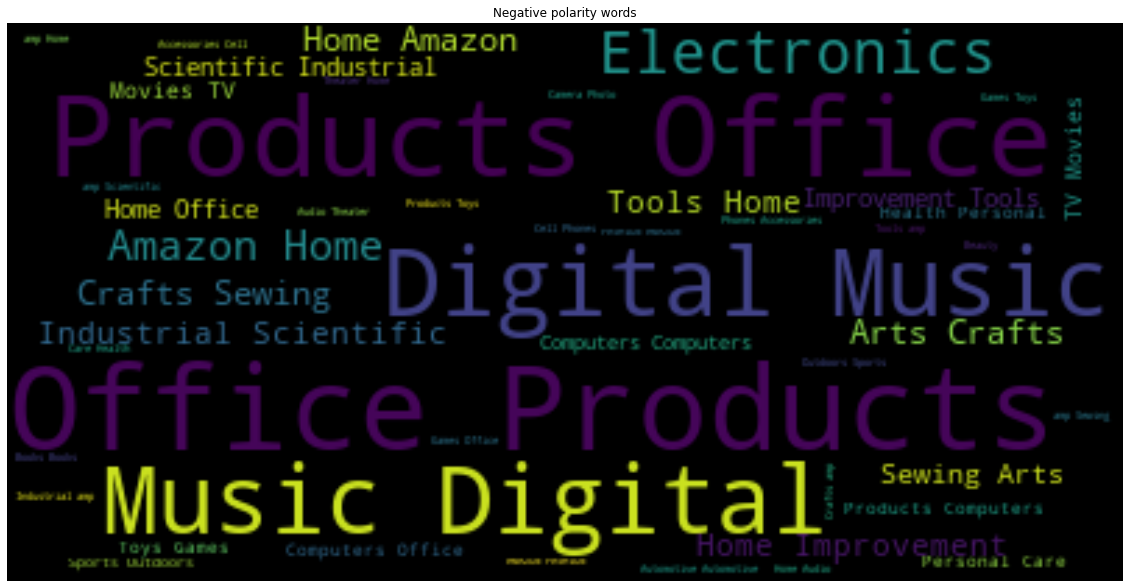

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Get only the positive reviews
negative_reviews = df[df['polarity'] == 'negative']['main_cat'].values

# Join all the reviews into a single string
review_text = ' '.join(negative_reviews)

# Create a wordcloud object
wordcloud = WordCloud().generate(review_text)

# Plot the wordcloud
plt.figure(figsize=(20,26))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Negative polarity words')
plt.show()


# **here we can see the main categories who has given the moderate customers**

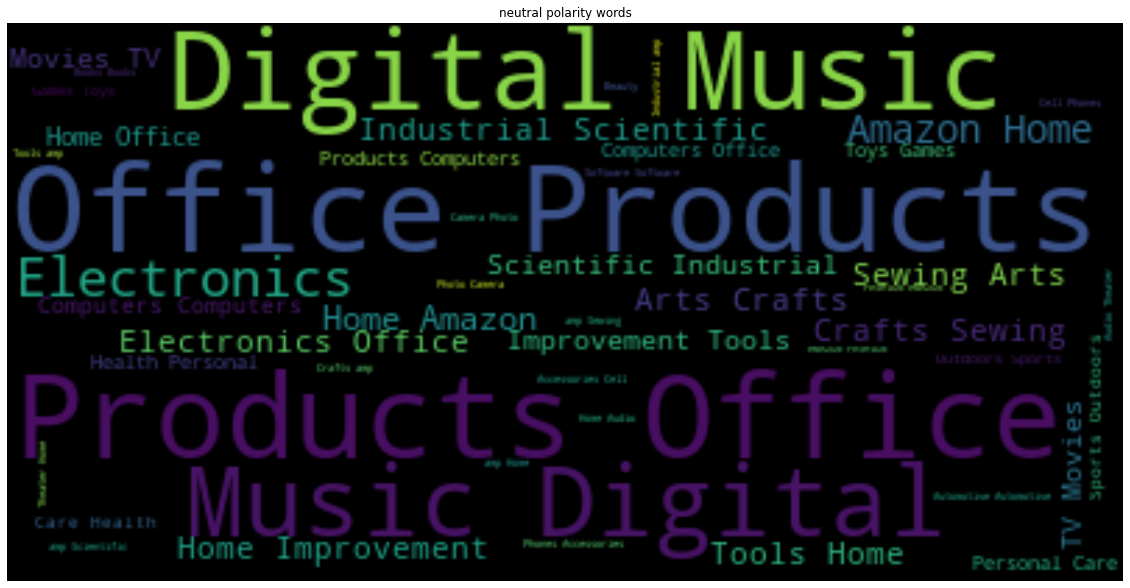

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Get only the positive reviews
neutral_reviews = df[df['polarity'] == 'neutral']['main_cat'].values

# Join all the reviews into a single string
review_text = ' '.join(neutral_reviews)

# Create a wordcloud object
wordcloud = WordCloud().generate(review_text)

# Plot the wordcloud
plt.figure(figsize=(20,26))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('neutral polarity words')
plt.show()


In [ ]:
pip install fasttext

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.8/68.8 KB 3.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached pybind11-2.10.3-py3-none-any.whl (222 kB)
  Created wheel for fasttext: filename=fasttext-0.9.2-cp38-cp38-linux_x86_64.whl size=3137921 sha256=c0e643470c52a7f65d9033216d45216fa4085ccd147702ae3d16636249da2846
  Stored in directory: /root/.cache/pip/wheels/93/61/2a/c54711a91c418ba06ba195b1d78ff24fcaad8592f2a694ac94
Successfully built fasttext


In [ ]:

import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

True

In [ ]:
import pandas as pd
import fasttext
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import silhouette_score

In [ ]:
Amazon_products1=pd.read_csv('/content/drive/MyDrive/Umesh Project Files/office products and Cd-vinyl/final true records.csv')

In [ ]:
Amazon_products1.head(3)

reviewerID        asin     reviewerName  verified  \
0  A2YCGMW0ZKPYZ2  0788602144  Bernard Perusse      True   
1   A5N992ESD6UHW  0967680654        Jonny Lee      True   
2  A35L775VMC0BKL  0967680654               Fm      True   

                                          reviewText  \
0  The answer, of course, is no. A lot of time ha...   
1  A bit outdated, from a special-effects/technol...   
2                                          Thank you   

                             preprocessed_reviewText  polarity_score  \
0  answer course lot time spent whining stuff hul...        0.301852   
1  bit outdated special effect technology point v...        0.025562   
2                                              thank        0.000000   

   polarity  overall        date  \
0  positive        4  2002-07-08   
1   neutral        4  2016-06-21   
2   neutral        5  2015-11-18   

                                             summary            brand  \
0                              Nostalgia: overrated?  Patrick Adiarte   
1  Would be Nice to See This Effective Concept Re...     Daniel Kruse   
2                                         Five Stars     Daniel Kruse   

                                    category     main_cat sub_category  
0  CDs & Vinyl,Classic Rock,British Invasion  Movies & TV          DVD  
1   CDs & Vinyl,Christian,Pop & Contemporary  Movies & TV          DVD  
2   CDs & Vinyl,Christian,Pop & Contemporary  Movies & TV          DVD

In [ ]:
Amazon_products1.dropna(inplace=True)

In [ ]:
def cal_missing_value(df):
    total=df.isnull().sum().sort_values(ascending=False)
    percentage=(df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)
    missing_data=pd.concat([total,percentage], axis=1, keys=['Total','Percentage'])
    return missing_data

In [ ]:
cal_missing_value(Amazon_products1)

Total  Percentage
reviewerID                   0         0.0
asin                         0         0.0
reviewerName                 0         0.0
verified                     0         0.0
reviewText                   0         0.0
preprocessed_reviewText      0         0.0
polarity_score               0         0.0
polarity                     0         0.0
overall                      0         0.0
date                         0         0.0
summary                      0         0.0
brand                        0         0.0
category                     0         0.0
main_cat                     0         0.0
sub_category                 0         0.0

In [ ]:
Amazon_products1['preprocessed_reviewText'] 

0          answer course lot time spent whining stuff hul...
1          bit outdated special effect technology point v...
2                                                      thank
3                                                       good
4          good someone trying make decision think help m...
                                 ...                        
1375267                                                   ok
1375268    awesome perfect art work thnk super fast delivery
1375269                                               useful
1375270                                                 good
1375271    good bag issue static pull seems worse brand m...
Name: preprocessed_reviewText, Length: 1370931, dtype: object

# Fast_Text Modelling.

In [ ]:
output_file = 'text_data.txt'

#Concatenate all the rows of 'cleaned' column into single string
cleaned_text = " ".join(Amazon_products1['preprocessed_reviewText'])

#Write the string to text file
with open(output_file, 'w', encoding='utf-8') as f:
    f.write(cleaned_text)

In [ ]:
model = fasttext.train_unsupervised('/content/text_data.txt', model='skipgram', dim=100)

In [ ]:
Amazon_products1['vec'] =Amazon_products1['preprocessed_reviewText'].apply(lambda x: model.get_sentence_vector(x))

In [ ]:
Amazon_products1['vec'][0:1]

0    [0.038591642, 0.07825325, -0.047687493, -0.071...
Name: vec, dtype: object

## Clustering Attempt
Use Elbow Method to find the optimal number of k.
Here, we'll use K-means algorithm for clustering. You may experiment with other algorithms.

### Elbow Method

In [ ]:

from sklearn.cluster import KMeans

In [ ]:
sum_of_squared_distances = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(pd.DataFrame(Amazon_products1['vec'].values.tolist()))
    sum_of_squared_distances.append(km.inertia_)

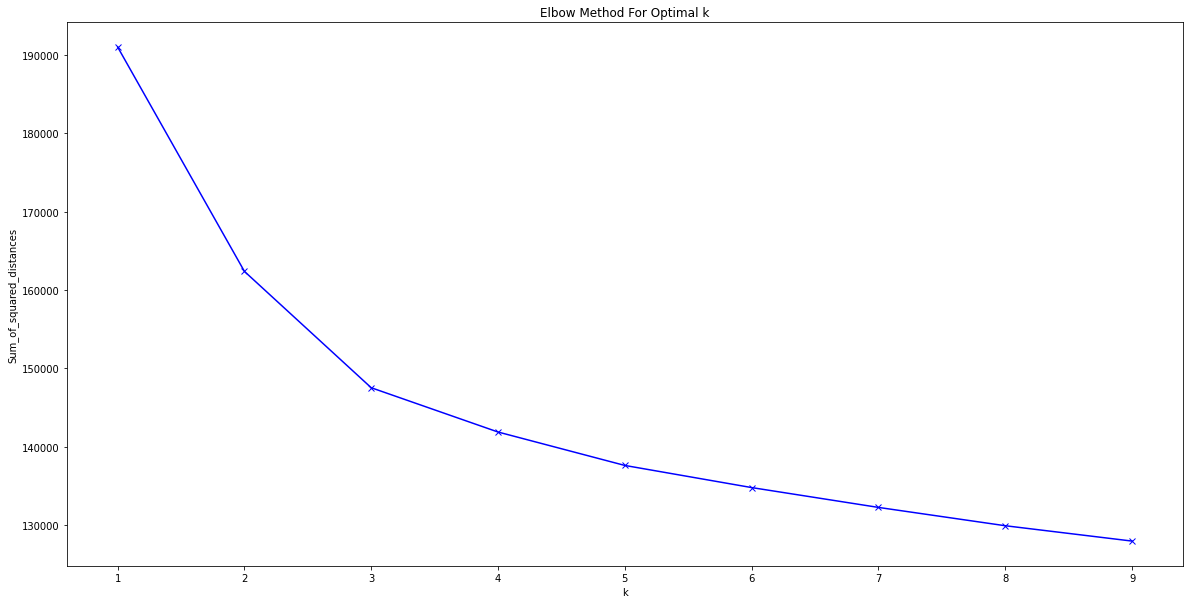

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

### KMeans Clustering

In [ ]:
kmeans = KMeans(n_clusters=2)  
kmeans.fit(Amazon_products1['vec'].values.tolist())

KMeans(n_clusters=2)

In [ ]:
Amazon_products1['cluster'] = kmeans.fit_predict(Amazon_products1['vec'].values.tolist())

In [ ]:
Amazon_products1.groupby(['cluster'])['main_cat'].value_counts()

cluster  main_cat                     
0        Digital Music                    191207
         Office Products                  112844
         All Electronics                    9447
         Amazon Home                        3344
         Arts, Crafts & Sewing              2592
                                           ...  
1        Cell Phones &amp; Accessories        42
         Buy a Kindle                         22
         Grocery                              21
         Amazon Devices                        7
         Portable Audio & Accessories          4
Name: main_cat, Length: 71, dtype: int64

In [ ]:
Amazon_products1.groupby(['cluster'])['polarity'].value_counts()

cluster  polarity
0        positive    297989
         neutral      24607
         negative      7656
1        positive    856992
         neutral     130990
         negative     52697
Name: polarity, dtype: int64

# WordCluster:Checking for keywords.


In [ ]:


#word cloud
def word_cloud(pred_df,label):
    wc = ' '.join([text for text in Amazon_products1['review_text'][Amazon_products1['cluster']  == label]])
    wordcloud = WordCloud(width=800, height=500,
    random_state=21, max_font_size=110).generate(wc)
    fig7 = plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    

# Cluster 0 : 
1)We can see that mostly word present related to category office product and words which imply good impression like great ,love, perfect for the category.

2)Yes do have words related to Cd and Vinyl but there ratio is less compared to office products.



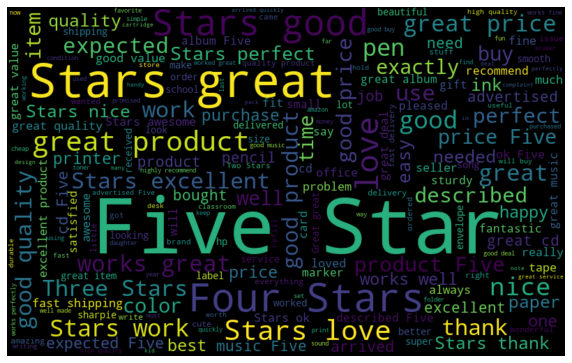

In [ ]:
word_cloud(Amazon_products1,0)

# Cluster 1 : 
1)We can see that mostly word present related to category Cd and Vinyl and words which imply good impression like best ,love, perfect for the category.

2)Yes do have words related to office product  but there ratio is less compared to office products.


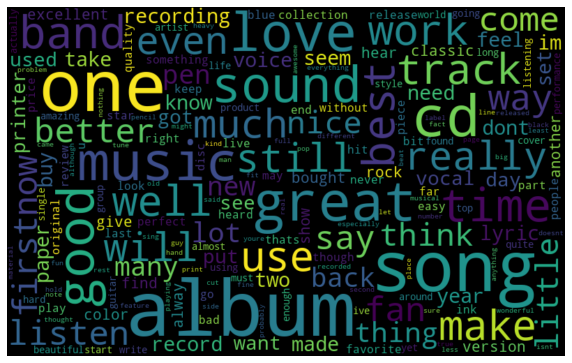

In [ ]:
word_cloud(Amazon_products1,1)

# PCA 

In [ ]:
pca = PCA(n_components=2)
Amazon_products1['x'] = pca.fit_transform(Amazon_products1['vec'].values.tolist())[:,0]
Amazon_products1['y'] = pca.fit_transform(Amazon_products1['vec'].values.tolist())[:,1]
# Amazon_products1_balanced['z'] = pca.fit_transform(Amazon_products1_balanced['vec'].values.tolist())[:,2]

In [ ]:
print(pca.explained_variance_ratio_)

[0.20652076 0.12186997]


In [ ]:
Amazon_products1.head()

reviewerID        asin     reviewerName  verified  \
0  A2YCGMW0ZKPYZ2  0788602144  Bernard Perusse      True   
1   A5N992ESD6UHW  0967680654        Jonny Lee      True   
2  A35L775VMC0BKL  0967680654               Fm      True   
3  A1ZJJKOC38Q622  0967680654            mitzi      True   
4  A2S78BQKIPAMT7  0967680654         faithful      True   

                                          reviewText  \
0  The answer, of course, is no. A lot of time ha...   
1  A bit outdated, from a special-effects/technol...   
2                                          Thank you   
3                                          very good   
4  This is good for someone who is trying to make...   

                             preprocessed_reviewText  polarity_score  \
0  answer course lot time spent whining stuff hul...        0.301852   
1  bit outdated special effect technology point v...        0.025562   
2                                              thank        0.000000   
3                                               good        0.700000   
4  good someone trying make decision think help m...        0.700000   

   polarity  overall        date  \
0  positive        4  2002-07-08   
1   neutral        4  2016-06-21   
2   neutral        5  2015-11-18   
3  positive        5  2015-01-21   
4  positive        5  2013-02-02   

                                             summary            brand  \
0                              Nostalgia: overrated?  Patrick Adiarte   
1  Would be Nice to See This Effective Concept Re...     Daniel Kruse   
2                                         Five Stars     Daniel Kruse   
3                                         Five Stars     Daniel Kruse   
4                                   Escape from Hell     Daniel Kruse   

                                    category     main_cat sub_category  \
0  CDs & Vinyl,Classic Rock,British Invasion  Movies & TV          DVD   
1   CDs & Vinyl,Christian,Pop & Contemporary  Movies & TV          DVD   
2   CDs & Vinyl,Christian,Pop & Contemporary  Movies & TV          DVD   
3   CDs & Vinyl,Christian,Pop & Contemporary  Movies & TV          DVD   
4   CDs & Vinyl,Christian,Pop & Contemporary  Movies & TV     Audio CD   

                                                 vec  cluster         x  \
0  [0.038591642, 0.07825325, -0.047687493, -0.071...        1  0.137575   
1  [0.05979291, 0.11855268, -0.041652136, -0.0807...        1  0.161798   
2  [0.046117023, -0.015501808, -0.10550028, -0.00...        0 -0.390184   
3  [-0.024402432, 0.046032373, -0.08743701, -0.02...        0 -0.339905   
4  [0.10037448, 0.093051754, -0.026989475, -0.028...        1  0.081717   

          y  
0 -0.103643  
1 -0.126547  
2  0.172332  
3 -0.043952  
4 -0.112607

#### 2D Scatterplot

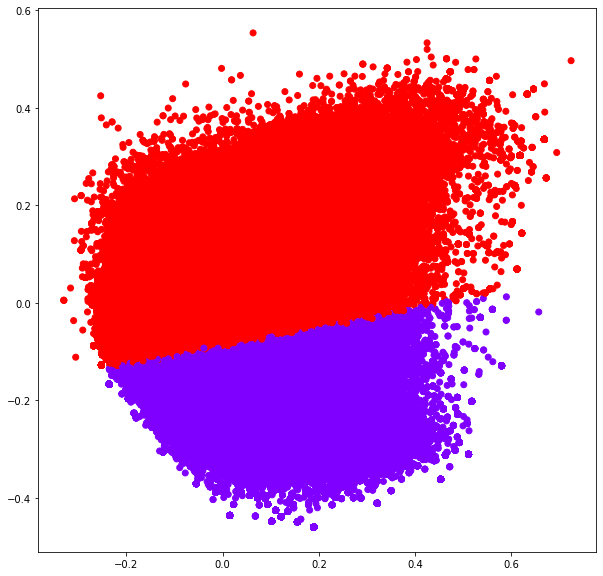

In [ ]:
plt.figure(1, figsize=(10,10))
plt.scatter(Amazon_products1['y'],Amazon_products1['x'], c=Amazon_products1['cluster'], cmap='rainbow')

# Compute the silhouette score

In [ ]:
cluster_labels = kmeans.labels_

In [ ]:
# Compute the silhouette score
%%time
silhouette_avg = silhouette_score(Amazon_products1['vec'].values.tolist(), cluster_labels)
print(f"The silhouette score is {silhouette_avg}")